In [1]:
#!pip install nltk
#!pip install unidecode
#!pip install wordcloud

In [2]:
from encodings.utf_8 import encode
from time import sleep
import pandas as pd
import unidecode
import numpy as np
from matplotlib import pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

texto = pd.read_csv("F:\\FAESA\\Teste de software\\Complemento.txt", sep="\r")

for i in texto:
    print(i)


resultado


In [3]:
linhas = texto.values.tolist()

In [4]:
print(linhas)

[['O Brasil é um país único. Ontem Bolsonaro disse que só ganhei as eleições porque o povo nordestino é analfabeto. Quem tem uma gota de sangue nordestino não pode votar nesse sujeito. Os nordestinos estão em todo o Brasil, trabalham e constroem esse país.'], ['Em São Bernardo, onde tudo começou, com Fernando Haddad, Geraldo Alckmin e Guilherme Boulos, iniciando nossa caminhada no segundo turno. Vamos juntos, por São Paulo, pelo Brasil, pelo nosso povo. #equipeLula #BrasilDaEsperança'], ['Lula e Haddad em caminhada em São Bernardo do Campo'], ['Não é verdade que o candidato do PT à Presidência, Luiz Inácio Lula da Silva, propõe a criação de banheiros infantis unissex se for eleito, conforme insinuam postagens nas redes sociais. Não há qualquer menção a essa proposta nas diretrizes da chapa petista registradas no TSE (Tribunal Superior Eleitoral), e a campanha do ex-presidente desmentiu a alegação. As publicações mostram uma placa de Campinas (SP), onde as escolas infantis contam com ba

In [5]:
postes = []
for dados in linhas:
    for posts in dados:
        posts = unidecode.unidecode(posts)
        posts = posts.lower().replace("... ver mais", "")
        postes.append(posts) 

In [6]:
postes

['o brasil e um pais unico. ontem bolsonaro disse que so ganhei as eleicoes porque o povo nordestino e analfabeto. quem tem uma gota de sangue nordestino nao pode votar nesse sujeito. os nordestinos estao em todo o brasil, trabalham e constroem esse pais.',
 'em sao bernardo, onde tudo comecou, com fernando haddad, geraldo alckmin e guilherme boulos, iniciando nossa caminhada no segundo turno. vamos juntos, por sao paulo, pelo brasil, pelo nosso povo. #equipelula #brasildaesperanca',
 'lula e haddad em caminhada em sao bernardo do campo',
 'nao e verdade que o candidato do pt a presidencia, luiz inacio lula da silva, propoe a criacao de banheiros infantis unissex se for eleito, conforme insinuam postagens nas redes sociais. nao ha qualquer mencao a essa proposta nas diretrizes da chapa petista registradas no tse (tribunal superior eleitoral), e a campanha do ex-presidente desmentiu a alegacao. as publicacoes mostram uma placa de campinas (sp), onde as escolas infantis contam com banhei

In [7]:
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(postes)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
df
df.to_csv("TF_complemento.csv", encoding = "utf-8", index = False)

C:\Users\Nicole\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(postes)
vectorizer.get_feature_names()
X_Array = X.toarray()
df1 = pd.DataFrame(data=X_Array,columns = vectorizer.get_feature_names())
df1
df1.to_csv("TFIDF_complemento.csv", encoding = "utf-8", index = False)

C:\Users\Nicole\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
divisao = df1/df
divisao = divisao.fillna(0)
divisao.to_csv("IDF_complemento.csv", encoding = "utf-8", index = False)

In [10]:
dataset = X_Array

In [11]:
# determining the maximum number of clusters 
# using the simple method
limit = int((dataset.shape[0]//2)**0.5)
  
# selecting optimal value of 'k'
# using elbow method
  
# wcss - within cluster sum of
# squared distances
wcss = {}
  
for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset)
    wcss[k] = model.inertia_      


In [12]:
keys = wcss.keys() 

In [13]:
values = wcss.values()

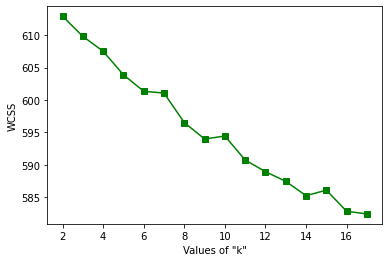

In [14]:
# plotting the wcss values
# to find out the elbow value
plt.plot(keys, values, 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

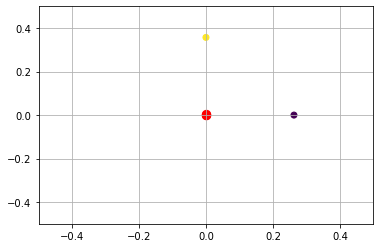

In [15]:
kmeans = KMeans(n_clusters = 3, #numero de clusters
                
init = 'k-means++', n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva

max_iter = 300) #numero máximo de iterações

pred_y = kmeans.fit_predict(dataset)

plt.scatter(dataset[:,1], dataset[:,0], c = pred_y) #posicionamento dos eixos x e y
plt.xlim(-0.5, 0.5) #range do eixo x
plt.ylim(-0.5, 0.5) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

In [16]:
kmeans.labels_

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,

In [17]:
df["cluster"] = kmeans.labels_

In [18]:
df1["cluster"] = kmeans.labels_

In [19]:
divisao["cluster"] = kmeans.labels_

In [20]:
df.columns

Index(['002', '02', '04', '05', '06', '07', '10', '100', '11', '12',
       ...
       'xoraoaline', 'yanomami', 'york', 'youtube', 'youtuber', 'zanin',
       'zema', 'zerados', 'zona', 'cluster'],
      dtype='object', length=3401)

In [21]:
df

,002,02,04,05,06,07,10,100,11,12,...,xoraoaline,yanomami,york,youtube,youtuber,zanin,zema,zerados,zona,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#df.to_csv("Postagens TFIDF.csv", encoding = "utf-8", index = False)

In [23]:
dfposts = pd.DataFrame(postes, columns=["Posts"])


In [24]:
dfposts["cluster"] = kmeans.labels_
dfposts

,Posts,cluster
0,o brasil e um pais unico. ontem bolsonaro diss...,0
1,"em sao bernardo, onde tudo comecou, com fernan...",0
2,lula e haddad em caminhada em sao bernardo do ...,1
3,nao e verdade que o candidato do pt a presiden...,1
4,sao bernardo nos deu a vitoria no 1o turno e v...,1
...,...,...
630,"pai, estou contigo pro que der e vier!",0
631,nova nota de militares mostra esforco para se ...,1
632,o gesto e inedito entre os presidentes brasile...,0
633,#recordemos,0


In [25]:
dfposts[dfposts.cluster == 2].sample(5).values

array([['propaganda eleitoral, presenca em cultos e reunioes com prefeitos: entenda a estrategia do candidato a reeleicao para virar votos no 2o turno  (via uol noticias)',
        2],
       ['informacoes presidente ', 2],
       ['informacoes presidente ', 2],
       ['marca do petista foi registrada em apenas 20 minutos de programa',
        2],
       ['objetivo da campanha e convencer o cantor a declarar seu voto na semana do segundo turno (via splash uol)',
        2]], dtype=object)

In [26]:
condicoes = [(dfposts['cluster'] == 0), 
             (dfposts['cluster'] == 1), 
             (dfposts['cluster'] == 2)]
opcoes = ["negativo", "neutro", "positivo"]
dfposts['sentimento'] = np.select(condicoes, opcoes)

In [27]:
df["sentimento"] = dfposts['sentimento']
df1["sentimento"] = dfposts['sentimento']
divisao["sentimento"] = dfposts['sentimento']

In [28]:
#dfposts.to_csv("Postagens com rotulo.csv", encoding = "utf-8", index = False)

In [29]:
#first_column = df.pop('sentimento')
#df.insert(2583, 'sentimento', first_column)
#df

## Lendo dataset criados

In [30]:
dict_classe = {
    'positivo':0, 'negativo':1, 'neutro':2
}

### TFIDF

In [31]:
df = pd.read_csv('https://github.com/NickMC88/Projeto-Integrador-IV/blob/main/TFIDF.csv?raw=true', sep=';')
df.replace({'sentimento':dict_classe}, inplace=True)
df.head(3)

,2,5,6,7,10,100,11,12,13,14,...,voto,votos,vou,www,xoraoaline,yanomami,youtube,zema,zona,sentimento
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Treino e teste com modelos supervisionados - TFIDF

In [32]:
x = df.drop(['sentimento'],axis=1)
y = df['sentimento']

In [33]:
matriz_correlacao = x.corr()
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
variaveis_correlacao = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacao

2              2.0
5              2.0
7              2.0
100            4.0
180            8.0
              ... 
www            3.0
xoraoaline     5.0
yanomami       8.0
youtube       11.0
zona           6.0
Length: 1671, dtype: float64

In [34]:
colunas_correlacao = pd.DataFrame(variaveis_correlacao).reset_index()
colunas_correlacao = colunas_correlacao['index'].tolist()

In [35]:
x = x.drop(colunas_correlacao, axis = 1)

In [36]:
x.shape

(451, 911)

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
SEED = 22
np.random.seed(SEED)

modelo = RandomForestClassifier(max_depth=20, random_state=0)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.3) #70% treino /30% teste

In [38]:
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

print(f'Acuracia de: {accuracy_score(teste_y, previsoes) * 100:.2f}%')

Acuracia de: 85.29%


<AxesSubplot:>

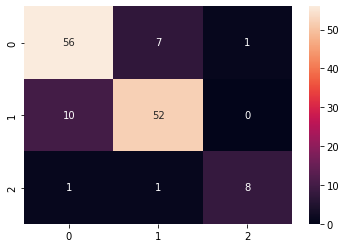

In [39]:
matriz = confusion_matrix(teste_y, previsoes)
sns.heatmap(matriz, annot=True)

In [40]:
print(classification_report(teste_y, previsoes, digits=3))

              precision    recall  f1-score   support

           0      0.836     0.875     0.855        64
           1      0.867     0.839     0.852        62
           2      0.889     0.800     0.842        10

    accuracy                          0.853       136
   macro avg      0.864     0.838     0.850       136
weighted avg      0.854     0.853     0.853       136



### XGBoost

In [41]:
modelo = GradientBoostingClassifier(n_estimators=100)

In [42]:

modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

print(f'Acuracia de: {accuracy_score(teste_y, previsoes) * 100:.2f}%')

Acuracia de: 89.71%


<AxesSubplot:>

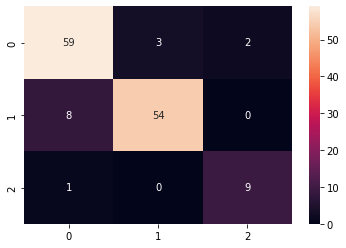

In [43]:
matriz = confusion_matrix(teste_y, previsoes)
sns.heatmap(matriz, annot=True)

In [44]:
print(classification_report(teste_y, previsoes, digits=3))

              precision    recall  f1-score   support

           0      0.868     0.922     0.894        64
           1      0.947     0.871     0.908        62
           2      0.818     0.900     0.857        10

    accuracy                          0.897       136
   macro avg      0.878     0.898     0.886       136
weighted avg      0.900     0.897     0.897       136



### Adaboost

In [45]:
modelo = AdaBoostClassifier(n_estimators=100)

In [46]:
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

print(f'Acuracia de: {accuracy_score(teste_y, previsoes) * 100:.2f}%')

Acuracia de: 63.97%


<AxesSubplot:>

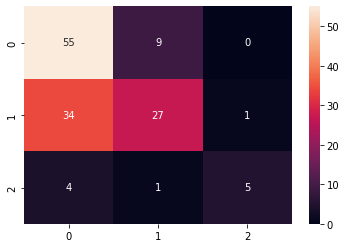

In [47]:
matriz = confusion_matrix(teste_y, previsoes)
sns.heatmap(matriz, annot=True)

In [48]:
print(classification_report(teste_y, previsoes, digits=3))

              precision    recall  f1-score   support

           0      0.591     0.859     0.701        64
           1      0.730     0.435     0.545        62
           2      0.833     0.500     0.625        10

    accuracy                          0.640       136
   macro avg      0.718     0.598     0.624       136
weighted avg      0.672     0.640     0.624       136



### Multinomial NB

In [49]:
modelo = MultinomialNB()

In [50]:
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

print(f'Acuracia de: {accuracy_score(teste_y, previsoes) * 100:.2f}%')

Acuracia de: 78.68%


<AxesSubplot:>

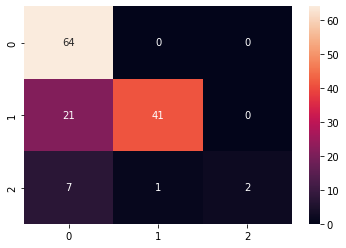

In [51]:
matriz = confusion_matrix(teste_y, previsoes)
sns.heatmap(matriz, annot=True)

In [52]:
print(classification_report(teste_y, previsoes, digits=3))

              precision    recall  f1-score   support

           0      0.696     1.000     0.821        64
           1      0.976     0.661     0.788        62
           2      1.000     0.200     0.333        10

    accuracy                          0.787       136
   macro avg      0.891     0.620     0.647       136
weighted avg      0.846     0.787     0.770       136



## Validação

In [53]:
df_validacao = pd.read_csv('https://github.com/NickMC88/Projeto-Integrador-IV/blob/main/TFIDF_complemento.csv?raw=true')
#df_validacao.replace({'sentimento':dict_classe}, inplace=True)
df_validacao = df_validacao.drop(['sentimento'], axis=1)
df_validacao.head(3)
# df_validacao.replace({'sentimento':dict_classe}, inplace=True)

,002,02,04,05,06,07,10,100,11,12,...,xoraoaline,yanomami,york,youtube,youtuber,zanin,zema,zerados,zona,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [54]:
df.shape

(451, 2583)

In [55]:
df_validacao.shape

(635, 3400)

In [56]:
x_validacao = df_validacao.drop(['cluster'], axis=1)
y_validacao = df_validacao['cluster']

In [57]:
treino_x = x_validacao[:451]
treino_y = y_validacao[:451]

In [58]:
teste_x = x_validacao[451:]
teste_y = y_validacao[451:]

In [59]:
modelo = GradientBoostingClassifier(n_estimators=100)
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
print(f'Acuracia de: {accuracy_score(teste_y, previsoes) * 100:.2f}%')

Acuracia de: 88.04%


<AxesSubplot:>

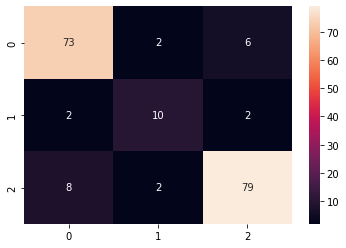

In [60]:
matriz = confusion_matrix(teste_y, previsoes)
sns.heatmap(matriz, annot=True)

In [61]:
print(classification_report(teste_y, previsoes, digits=3))

              precision    recall  f1-score   support

           0      0.880     0.901     0.890        81
           1      0.714     0.714     0.714        14
           2      0.908     0.888     0.898        89

    accuracy                          0.880       184
   macro avg      0.834     0.834     0.834       184
weighted avg      0.881     0.880     0.880       184



### TF

In [62]:
df = pd.read_csv('https://github.com/NickMC88/Projeto-Integrador-IV/blob/main/TF.csv?raw=true', sep=';')
df.replace({'sentimento':dict_classe}, inplace=True)
df.head(3)

,2,5,6,7,10,100,11,12,13,14,...,votos,vou,www,xoraoaline,yanomami,youtube,zema,zona,cluster,sentimento
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Treino e teste com modelos supervisionados - TF

In [63]:
x = df.drop(['sentimento'],axis=1)
y = df['sentimento']

In [64]:
matriz_correlacao = x.corr()
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
variaveis_correlacao = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacao

2              2.0
5              2.0
7              2.0
100            4.0
180            8.0
              ... 
www            3.0
xoraoaline     5.0
yanomami       8.0
youtube       11.0
zona           6.0
Length: 1671, dtype: float64

In [65]:
colunas_correlacao = pd.DataFrame(variaveis_correlacao).reset_index()
colunas_correlacao = colunas_correlacao['index'].tolist()

In [66]:
x = x.drop(colunas_correlacao, axis = 1)

In [67]:
x.shape

(451, 912)

### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
SEED = 22
np.random.seed(SEED)

modelo = RandomForestClassifier(max_depth=20, random_state=0)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.3) #70% treino /30% teste

In [69]:
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

print(f'Acuracia de: {accuracy_score(teste_y, previsoes) * 100:.2f}%')

Acuracia de: 97.79%


<AxesSubplot:>

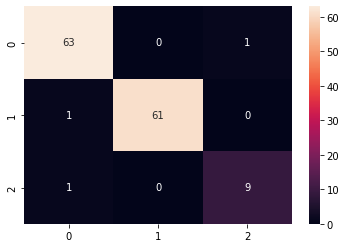

In [70]:
matriz = confusion_matrix(teste_y, previsoes)
sns.heatmap(matriz, annot=True)

In [71]:
print(classification_report(teste_y, previsoes, digits=3))

              precision    recall  f1-score   support

           0      0.969     0.984     0.977        64
           1      1.000     0.984     0.992        62
           2      0.900     0.900     0.900        10

    accuracy                          0.978       136
   macro avg      0.956     0.956     0.956       136
weighted avg      0.978     0.978     0.978       136



### XGBoost

In [72]:
modelo = GradientBoostingClassifier(n_estimators=100)

In [73]:
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

print(f'Acuracia de: {accuracy_score(teste_y, previsoes) * 100:.2f}%')

Acuracia de: 100.00%


<AxesSubplot:>

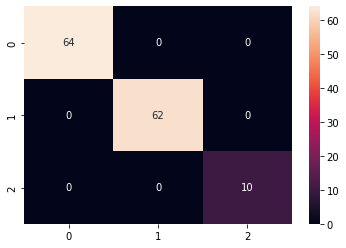

In [74]:
matriz = confusion_matrix(teste_y, previsoes)
sns.heatmap(matriz, annot=True)

In [75]:
print(classification_report(teste_y, previsoes, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        64
           1      1.000     1.000     1.000        62
           2      1.000     1.000     1.000        10

    accuracy                          1.000       136
   macro avg      1.000     1.000     1.000       136
weighted avg      1.000     1.000     1.000       136



### Adaboost

In [76]:
modelo = AdaBoostClassifier(n_estimators=100)

In [77]:
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

print(f'Acuracia de: {accuracy_score(teste_y, previsoes) * 100:.2f}%')

Acuracia de: 100.00%


<AxesSubplot:>

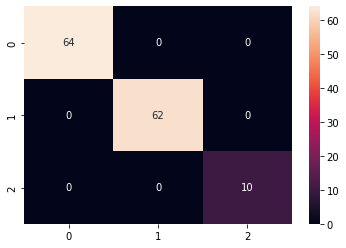

In [78]:
matriz = confusion_matrix(teste_y, previsoes)
sns.heatmap(matriz, annot=True)

In [79]:
print(classification_report(teste_y, previsoes, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        64
           1      1.000     1.000     1.000        62
           2      1.000     1.000     1.000        10

    accuracy                          1.000       136
   macro avg      1.000     1.000     1.000       136
weighted avg      1.000     1.000     1.000       136



### Multinomial NB

In [80]:
modelo = MultinomialNB()

In [81]:
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

print(f'Acuracia de: {accuracy_score(teste_y, previsoes) * 100:.2f}%')

Acuracia de: 89.71%


<AxesSubplot:>

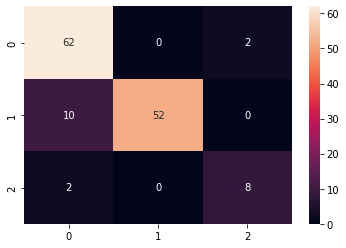

In [82]:
matriz = confusion_matrix(teste_y, previsoes)
sns.heatmap(matriz, annot=True)

In [83]:
print(classification_report(teste_y, previsoes, digits=3))

              precision    recall  f1-score   support

           0      0.838     0.969     0.899        64
           1      1.000     0.839     0.912        62
           2      0.800     0.800     0.800        10

    accuracy                          0.897       136
   macro avg      0.879     0.869     0.870       136
weighted avg      0.909     0.897     0.898       136



## Validação

In [84]:
df_validacao = pd.read_csv('https://github.com/NickMC88/Projeto-Integrador-IV/blob/main/TF_complemento.csv?raw=true')
#df_validacao.replace({'sentimento':dict_classe}, inplace=True)
df_validacao = df_validacao.drop(['sentimento'], axis=1)
df_validacao.head(3)
# df_validacao.replace({'sentimento':dict_classe}, inplace=True)

,002,02,04,05,06,07,10,100,11,12,...,xoraoaline,yanomami,york,youtube,youtuber,zanin,zema,zerados,zona,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df.shape

(451, 2584)

In [86]:
df_validacao.shape

(635, 3400)

In [87]:
x_validacao = df_validacao.drop(['cluster'], axis=1)
y_validacao = df_validacao['cluster']

In [88]:
treino_x = x_validacao[:451]
treino_y = y_validacao[:451]

In [89]:
teste_x = x_validacao[451:]
teste_y = y_validacao[451:]

In [90]:
modelo = GradientBoostingClassifier(n_estimators=100)
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
print(f'Acuracia de: {accuracy_score(teste_y, previsoes) * 100:.2f}%')

Acuracia de: 90.22%


<AxesSubplot:>

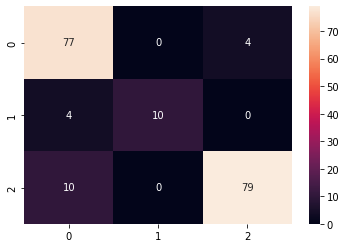

In [91]:
matriz = confusion_matrix(teste_y, previsoes)
sns.heatmap(matriz, annot=True)

In [92]:
print(classification_report(teste_y, previsoes, digits=3))

              precision    recall  f1-score   support

           0      0.846     0.951     0.895        81
           1      1.000     0.714     0.833        14
           2      0.952     0.888     0.919        89

    accuracy                          0.902       184
   macro avg      0.933     0.851     0.882       184
weighted avg      0.909     0.902     0.902       184



### IDF com classe

In [93]:
df = pd.read_csv('https://github.com/NickMC88/Projeto-Integrador-IV/blob/main/IDF.csv?raw=true', sep=';')
df.replace({'sentimento':dict_classe}, inplace=True)
df.head(3)

,2,5,6,7,10,100,11,12,13,14,...,voto,votos,vou,www,xoraoaline,yanomami,youtube,zema,zona,sentimento
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Treino e teste com modelos supervisionados - IDF

In [94]:
x = df.drop(['sentimento'],axis=1)
y = df['sentimento']

In [95]:
matriz_correlacao = x.corr()
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
variaveis_correlacao = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacao

2              2.0
5              2.0
7              2.0
100            4.0
180            8.0
              ... 
xoraoaline     5.0
yanomami       8.0
youtube       11.0
zema           2.0
zona           6.0
Length: 1673, dtype: float64

In [96]:
colunas_correlacao = pd.DataFrame(variaveis_correlacao).reset_index()
colunas_correlacao = colunas_correlacao['index'].tolist()

In [97]:
x = x.drop(colunas_correlacao, axis = 1)

In [98]:
x.shape

(451, 909)

### Random Forest

In [99]:
SEED = 22
np.random.seed(SEED)

modelo = RandomForestClassifier(max_depth=20, random_state=0)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.3) #70% treino /30% teste

In [100]:
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

print(f'Acuracia de: {accuracy_score(teste_y, previsoes) * 100:.2f}%')

Acuracia de: 87.50%


<AxesSubplot:>

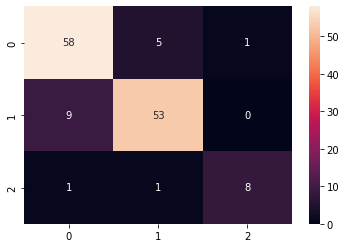

In [101]:
matriz = confusion_matrix(teste_y, previsoes)
sns.heatmap(matriz, annot=True)

In [102]:
print(classification_report(teste_y, previsoes, digits=3))

              precision    recall  f1-score   support

           0      0.853     0.906     0.879        64
           1      0.898     0.855     0.876        62
           2      0.889     0.800     0.842        10

    accuracy                          0.875       136
   macro avg      0.880     0.854     0.866       136
weighted avg      0.876     0.875     0.875       136



### XGBoost

In [103]:
modelo = GradientBoostingClassifier(n_estimators=100)

In [104]:
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

print(f'Acuracia de: {accuracy_score(teste_y, previsoes) * 100:.2f}%')

Acuracia de: 87.50%


<AxesSubplot:>

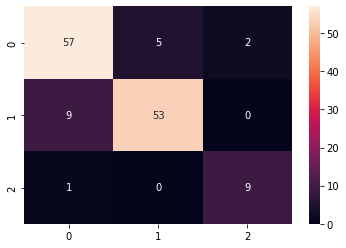

In [105]:
matriz = confusion_matrix(teste_y, previsoes)
sns.heatmap(matriz, annot=True)

In [106]:
print(classification_report(teste_y, previsoes, digits=3))

              precision    recall  f1-score   support

           0      0.851     0.891     0.870        64
           1      0.914     0.855     0.883        62
           2      0.818     0.900     0.857        10

    accuracy                          0.875       136
   macro avg      0.861     0.882     0.870       136
weighted avg      0.877     0.875     0.875       136



### Adaboost

In [107]:
modelo = AdaBoostClassifier(n_estimators=100)

In [108]:
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

print(f'Acuracia de: {accuracy_score(teste_y, previsoes) * 100:.2f}%')

Acuracia de: 78.68%


<AxesSubplot:>

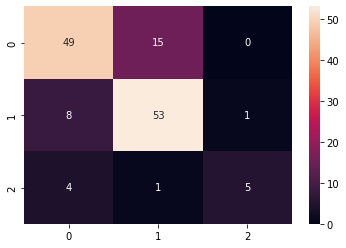

In [109]:
matriz = confusion_matrix(teste_y, previsoes)
sns.heatmap(matriz, annot=True)

In [110]:
print(classification_report(teste_y, previsoes, digits=3))

              precision    recall  f1-score   support

           0      0.803     0.766     0.784        64
           1      0.768     0.855     0.809        62
           2      0.833     0.500     0.625        10

    accuracy                          0.787       136
   macro avg      0.802     0.707     0.739       136
weighted avg      0.789     0.787     0.784       136



### Multinomial NB

In [111]:
modelo = MultinomialNB()

In [112]:
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

print(f'Acuracia de: {accuracy_score(teste_y, previsoes) * 100:.2f}%')

Acuracia de: 80.88%


<AxesSubplot:>

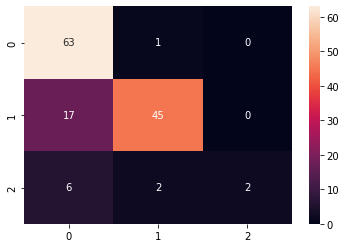

In [113]:
matriz = confusion_matrix(teste_y, previsoes)
sns.heatmap(matriz, annot=True)

In [114]:
print(classification_report(teste_y, previsoes, digits=3))

              precision    recall  f1-score   support

           0      0.733     0.984     0.840        64
           1      0.938     0.726     0.818        62
           2      1.000     0.200     0.333        10

    accuracy                          0.809       136
   macro avg      0.890     0.637     0.664       136
weighted avg      0.846     0.809     0.793       136



## Validação

In [115]:
df_validacao = pd.read_csv('https://github.com/NickMC88/Projeto-Integrador-IV/blob/main/IDF_complemento.csv?raw=true')
#df_validacao.replace({'sentimento':dict_classe}, inplace=True)
df_validacao = df_validacao.drop(['sentimento'], axis=1)
df_validacao.head(3)
# df_validacao.replace({'sentimento':dict_classe}, inplace=True)

,002,02,04,05,06,07,10,100,11,12,...,xoraoaline,yanomami,york,youtube,youtuber,zanin,zema,zerados,zona,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [116]:
df.shape

(451, 2583)

In [117]:
df_validacao.shape

(635, 3400)

In [118]:
x_validacao = df_validacao.drop(['cluster'], axis=1)
y_validacao = df_validacao['cluster']

In [119]:
treino_x = x_validacao[:451]
treino_y = y_validacao[:451]

In [120]:
teste_x = x_validacao[451:]
teste_y = y_validacao[451:]

In [121]:
modelo = GradientBoostingClassifier(n_estimators=100)
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
print(f'Acuracia de: {accuracy_score(teste_y, previsoes) * 100:.2f}%')

Acuracia de: 85.87%


<AxesSubplot:>

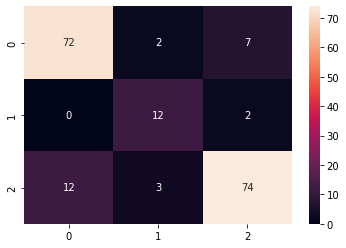

In [122]:
matriz = confusion_matrix(teste_y, previsoes)
sns.heatmap(matriz, annot=True)

In [123]:
print(classification_report(teste_y, previsoes, digits=3))

              precision    recall  f1-score   support

           0      0.857     0.889     0.873        81
           1      0.706     0.857     0.774        14
           2      0.892     0.831     0.860        89

    accuracy                          0.859       184
   macro avg      0.818     0.859     0.836       184
weighted avg      0.862     0.859     0.859       184



### Nuvem de palavras

In [124]:
palavras_chaves = []
for i in range(len(postes)):
  for palavra in postes[i].split(' '):
    palavras_chaves.append(palavra)

In [125]:
text = ''
for i in range(len(postes)):
  text = text + (postes[i])
text

'o brasil e um pais unico. ontem bolsonaro disse que so ganhei as eleicoes porque o povo nordestino e analfabeto. quem tem uma gota de sangue nordestino nao pode votar nesse sujeito. os nordestinos estao em todo o brasil, trabalham e constroem esse pais.em sao bernardo, onde tudo comecou, com fernando haddad, geraldo alckmin e guilherme boulos, iniciando nossa caminhada no segundo turno. vamos juntos, por sao paulo, pelo brasil, pelo nosso povo. #equipelula #brasildaesperancalula e haddad em caminhada em sao bernardo do camponao e verdade que o candidato do pt a presidencia, luiz inacio lula da silva, propoe a criacao de banheiros infantis unissex se for eleito, conforme insinuam postagens nas redes sociais. nao ha qualquer mencao a essa proposta nas diretrizes da chapa petista registradas no tse (tribunal superior eleitoral), e a campanha do ex-presidente desmentiu a alegacao. as publicacoes mostram uma placa de campinas (sp), onde as escolas infantis contam com banheiro infantil unis

In [126]:
palavras_chaves[0]

'o'

In [127]:
STOPWORDS = ['ver','principal','essa','vez','nas','mas','qual','principal','ele','ter','doença','pois','este','vez','ver principal','artigo principal','já','aos','pode','outro','artigo','desse','alguns','meio','entre','das','podem','esse','seu','também','são','quando','de', 'que','em','os','as','da','como','dos','ou','se','um','uma','para','na','ao','mais','por','não','ainda','muito','sua', 'e' , 'o', 'foi', 'nao', 'vai', 'ja', 'voce', 'deu', 'sao', 'pela', 'esta', 'hoje', 'nesse', 'diz', 'disse', 'pra', 'nos', 'fez', 'apos', 'todo', 'nosso', 'todos', 'eu', 'nesta', 'tem', 'quem', 'teve', 'tambem', 'ser'] + list(STOPWORDS)

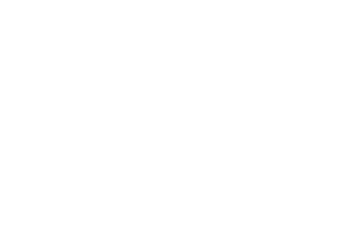

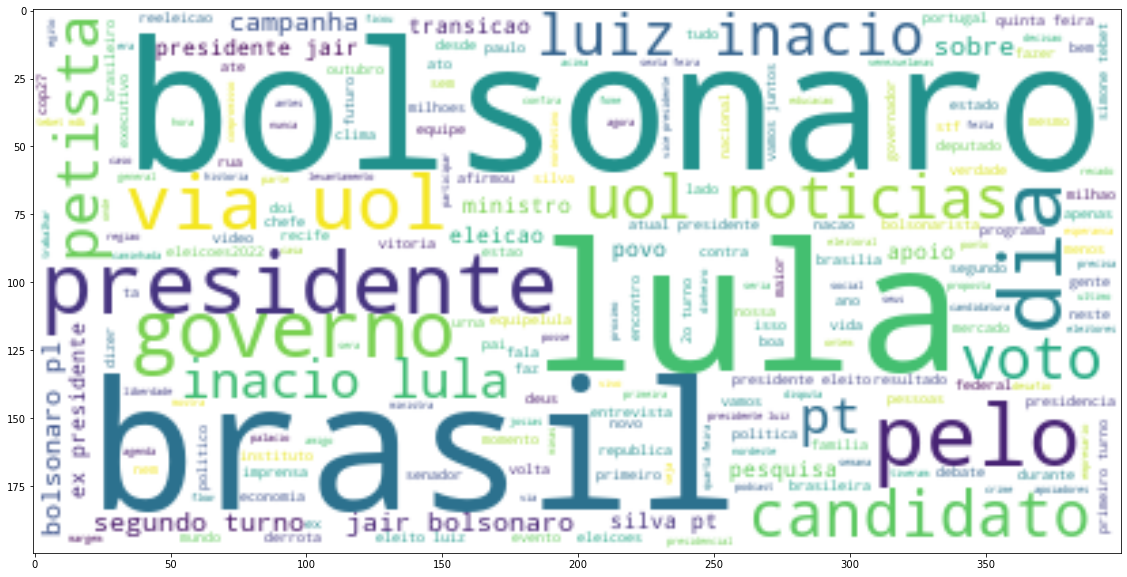

In [128]:
wc = WordCloud(stopwords=STOPWORDS, background_color="white", repeat=True)
wc.generate(text)

plt.axis("off")
plt.figure(figsize=(20,10) )
plt.imshow(wc, interpolation="bilinear")
plt.show()